In [ ]:
from google.colab import drive

drive.mount("/content/gdrive") 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd "/content/gdrive/MyDrive/Bloque 2 IA/Modulo 2 DL/Entregable "
!ls

/content/gdrive/MyDrive/Bloque 2 IA/Modulo 2 DL/Entregable 
 dataset       helado3.jfif   pizza2.jpeg		  Untitled0.ipynb
 helado1.jpg   helado4.jfif   Pizza-Ice_model.h5
 helado2.jpg   pizza1.jpg    'Pizza or ice-cream.ipynb'


#Módulo 2 Implementación de un modelo de deep learning.

##Importamos las libresisa que usaremos 

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator

##Preparacion de las imagenes

In [ ]:
# Debido a que tamaño del dataset de entrenamiento no es grande, generamos imagenes nuevas con las origibales con ligeras modificaciones
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 40,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True
                )

train_path = 'dataset/train'
train_set = train_datagen.flow_from_directory(
                directory=train_path,
                target_size=(150,150),
                batch_size=32,
                class_mode = 'categorical'
                )

val_datagen = ImageDataGenerator(rescale=1/255)
val_path = 'dataset/valid'
val_set = val_datagen.flow_from_directory(
                directory=val_path,
                target_size=(150,150),
                batch_size=32,
                class_mode = 'categorical'
                )

test_datagen = ImageDataGenerator(rescale=1/255)
test_path = 'dataset/test'
test_set = test_datagen.flow_from_directory(
                directory=test_path,
                target_size=(150,150),
                batch_size=32,
                class_mode = 'categorical'
                )

Found 718 images belonging to 2 classes.
Found 208 images belonging to 2 classes.
Found 106 images belonging to 2 classes.


Visualización de las labels de nuestro dataset

In [ ]:
train_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
val_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
test_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

##Creaccion del modelo

###Modelo 1

Para el primer modelo, se crea un modelo seciencil, el cual consiste de dos capas convolutivas y se realizan entre estas un maxpooling de 2x2, despues de esto, con los datos obtenidos creamos un arreglo usando Flatten y dos capas densas para la clasificacion de el modelo.

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = "relu", input_shape = (150,150,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(2, activation = "softmax"))

Para compilar el modelo usamos Adam optimizer, binary_crossentropy para la perdida (ya que nuestro modelo clasifica en dos caterorias) y como metric accuracy.

In [ ]:
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

Visualizacion del modelo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 36992)             0         
                                                                 
 dense (Dense)               (None, 256)               9

Entrenamiento

In [ ]:
hist = model.fit(train_set, validation_data = val_set, epochs = 10)

Epoch 1/10
23/23 [==============================] - 77s 3s/step - loss: 0.7940 - accuracy: 0.5474 - val_loss: 0.6916 - val_accuracy: 0.5481
Epoch 2/10
23/23 [==============================] - 79s 3s/step - loss: 0.6913 - accuracy: 0.5446 - val_loss: 0.6908 - val_accuracy: 0.5481
Epoch 3/10
23/23 [==============================] - 69s 3s/step - loss: 0.6905 - accuracy: 0.5446 - val_loss: 0.6898 - val_accuracy: 0.5481
Epoch 4/10
23/23 [==============================] - 71s 3s/step - loss: 0.6951 - accuracy: 0.5446 - val_loss: 0.6898 - val_accuracy: 0.5481
Epoch 5/10
23/23 [==============================] - 69s 3s/step - loss: 0.6906 - accuracy: 0.5390 - val_loss: 0.6896 - val_accuracy: 0.5481
Epoch 6/10
23/23 [==============================] - 73s 3s/step - loss: 0.6980 - accuracy: 0.5446 - val_loss: 0.6893 - val_accuracy: 0.5481
Epoch 7/10
23/23 [==============================] - 76s 3s/step - loss: 0.6897 - accuracy: 0.5446 - val_loss: 0.6891 - val_accuracy: 0.5481
Epoch 8/10
23/23 [==

###Modelo 2

En este nuevo modelo, se agrego un dropout de 25% despues del segundo MaxPool, esto para evitar overfitting, despues de esto, se agrego otra capa convolutiva y otra capa de MaxPool, para evitar overfitting se vuelve a hacer un dropout de 25% y finalmente de lo obtenido realizamos un Flatten y dos capas densas, pero en la capa final cambiamos de 'softmax' a 'sigmoid', ya que esta es mejor para clasificaciones binarias 

In [ ]:
model2 = Sequential()
model2.add(Conv2D(filters = 64, kernel_size = (5,5), activation = "relu", input_shape = (150,150,3)))
model2.add(MaxPool2D(pool_size = (2,2)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5), activation = "relu"))
model2.add(MaxPool2D(pool_size = (2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(filters = 16, kernel_size = (5,5), activation = "relu"))
model2.add(MaxPool2D(pool_size = (2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(256, activation = "relu"))
model2.add(Dense(2, activation = "sigmoid"))

Para compilar el modelo usamos Adam optimizer, binary_crossentropy para la perdida (ya que nuestro modelo clasifica en dos caterorias) y como metric accuracy.

In [ ]:
model2.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

Visualizacion del modelo

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 146, 146, 64)      4864      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 32)        51232     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 34, 34, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 16)       

Training del modelo

In [ ]:
hist2 = model2.fit(train_set, validation_data = val_set, epochs = 20)

Epoch 1/20
23/23 [==============================] - 84s 4s/step - loss: 0.6446 - accuracy: 0.6393 - val_loss: 0.6215 - val_accuracy: 0.6731
Epoch 2/20
23/23 [==============================] - 71s 3s/step - loss: 0.5149 - accuracy: 0.7813 - val_loss: 0.4357 - val_accuracy: 0.8317
Epoch 3/20
23/23 [==============================] - 70s 3s/step - loss: 0.5070 - accuracy: 0.7702 - val_loss: 0.4796 - val_accuracy: 0.7885
Epoch 4/20
23/23 [==============================] - 73s 3s/step - loss: 0.4556 - accuracy: 0.8078 - val_loss: 0.4213 - val_accuracy: 0.8269
Epoch 5/20
23/23 [==============================] - 81s 3s/step - loss: 0.4204 - accuracy: 0.8162 - val_loss: 0.3673 - val_accuracy: 0.8654
Epoch 6/20
23/23 [==============================] - 70s 3s/step - loss: 0.4509 - accuracy: 0.7967 - val_loss: 0.3454 - val_accuracy: 0.8702
Epoch 7/20
23/23 [==============================] - 71s 3s/step - loss: 0.4443 - accuracy: 0.8175 - val_loss: 0.3649 - val_accuracy: 0.8558
Epoch 8/20
23/23 [==

##Analisis de los resultados

###Modelo 1

Graficamos el accuracy y el loss de nuestro modelo1, y podemos ver que el accuracy tanto de train como del test casi no cambia y titne picos para abajo, por lo que el modelo no esta aprendiendo como nos gustaria, por la parte del loss, este igual se mantiene casi constante, unicamente con su desenso en la epoc 1

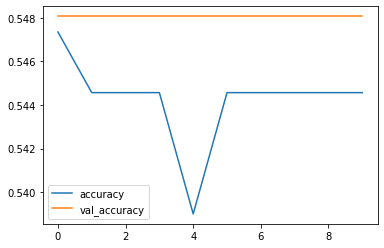

In [ ]:
# Plot training and val curves
import pandas as pd

df = pd.DataFrame(hist.history)
df.plot(y=['accuracy', 'val_accuracy'])

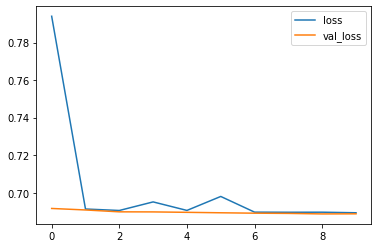

In [ ]:
df.plot(y=['loss', 'val_loss'])

In [ ]:
model.evaluate(test_set)

4/4 [==============================] - 3s 530ms/step - loss: 0.6875 - accuracy: 0.5566


[0.687502384185791, 0.5566037893295288]

###Modelo 2

En en caso del modelo 2, podemos ver que el accuracy del modelo va en aumento hasta pasar del 0.9, tanto en train como en validation,y al tener un acurracy mayor en validation, podemos ver que nuestro modelo no se encuentra overfiteado.

De igual forma, podemos ver como segun las epocs, el loss va bajando y tambien tenemos un acurracy muy alto en nuestro test.

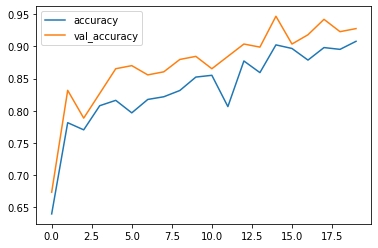

In [ ]:
# Plot training and val curves
import pandas as pd

df2 = pd.DataFrame(hist2.history)
df2.plot(y=['accuracy', 'val_accuracy'])

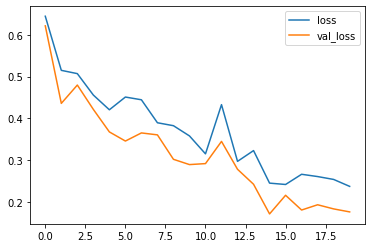

In [ ]:
df2.plot(y=['loss', 'val_loss'])

In [ ]:
model2.evaluate(test_set)

4/4 [==============================] - 3s 541ms/step - loss: 0.1618 - accuracy: 0.9528


[0.16175462305545807, 0.9528301954269409]

##Cambios realizados para mejora del modelo

En este caso, para la mejora del modelo lo que se agrego fue el dropeo del 25% de los nodos, para evitar overfitting, agregamos otra capa de conv2D y otra de Maxpooling, para un mayor procesamiento de los datos y otro dropeo final del 25% nuevamente. 

Tambien se cambio la activacion de la ultima capa densa del modelo de softmax a sigmoid, ya que estamos trabajando con un modelo binario y esta activación es mejor[1]

Aparte de esto se entreno con una mayor cantidad de epocas en el segundo modelo para que asi el modelo tenga mayor oportunidad de aprender.

1. https://towardsdatascience.com/sigmoid-and-softmax-functions-in-5-minutes-f516c80ea1f9

Resultados obtenidos en el modelo 1:                  

Train_accuracy: 0.54                                  

Validation_accuracy: 0.54                             

Test_accuracy: 0.55                                   

---



Resultados obtenidos en el modelo 2:

Train_accuracy: 0.90

Validation_accuracy: 0.92

Test_accuracy: 0.95




##Guardado del modelo

In [ ]:
hist2.model.save('Pizza-Ice_model.h5')